In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

The data is available from [data.settle.gov](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy). The following cell downloads it to a `data` folder. It's an uncompressed CSV; about 800MB.

From the [source](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy):
> This data represents police response activity. Each row is a record of a Call for Service (CfS) logged with the Seattle Police Department (SPD) Communications Center. Calls originated from the community and range from in progress or active emergencies to requests for problem solving. Additionally, officers will log calls from their observations of the field.

In [2]:
! mkdir data
! wget https://data.seattle.gov/api/views/33kz-ixgy/rows.csv?accessType=DOWNLOAD -O data/calls.csv

mkdir: cannot create directory ‘data’: File exists
--2020-12-17 04:51:50--  https://data.seattle.gov/api/views/33kz-ixgy/rows.csv?accessType=DOWNLOAD
Resolving data.seattle.gov (data.seattle.gov)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.seattle.gov (data.seattle.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data/calls.csv’

data/calls.csv          [      <=>           ] 800.06M  7.17MB/s    in 1m 49s  

2020-12-17 04:53:39 (7.34 MB/s) - ‘data/calls.csv’ saved [838920582]



Load the table.

In [3]:
df = pd.read_csv("data/calls.csv")

Parse the "Original Time Queued" column as a datetime, and stash the date in a new column.

In [4]:
df["Original Time Queued"] = pd.to_datetime( df["Original Time Queued"], format="%m/%d/%Y %H:%M:%S %p" )
df["date"] = df["Original Time Queued"].dt.date

Take a look at the first few rows.

In [5]:
df.head(5)

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,date
0,2020000233479,ASSISTANCE RENDERED,911,3,DETOX - REQUEST FOR,--INTOX & LIQ VIOLS - INTOXICATED PERSON,2020-08-06 17:34:41,Jan 01 1900 00:00:00:000AM,WEST,KING,K1,2020-08-06
1,2019000361401,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,2019-09-27 12:24:17,Sep 27 2019 12:24:17:000PM,SOUTH,OCEAN,O1,2019-09-27
2,2020000111997,ASSISTANCE RENDERED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","--ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)",2020-04-02 17:43:40,Apr 02 2020 17:51:25:000PM,NORTH,LINCOLN,L3,2020-04-02
3,2020000342019,ORAL WARNING GIVEN,ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,2020-12-11 20:48:53,Dec 11 2020 20:48:53:000PM,NORTH,NORA,N3,2020-12-11
4,2016000440706,ASSISTANCE RENDERED,911,2,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,2016-12-07 23:56:56,Jan 01 1900 00:00:00:000AM,SOUTH,ROBERT,R1,2016-12-07


A few days after the murder of George Floyd by Minneapolis police officers, the numver of police-initiated "ONVIEW" CfS events dropped to nearly one fifth of previous levels. Let's call this the "George Floyd abdication".

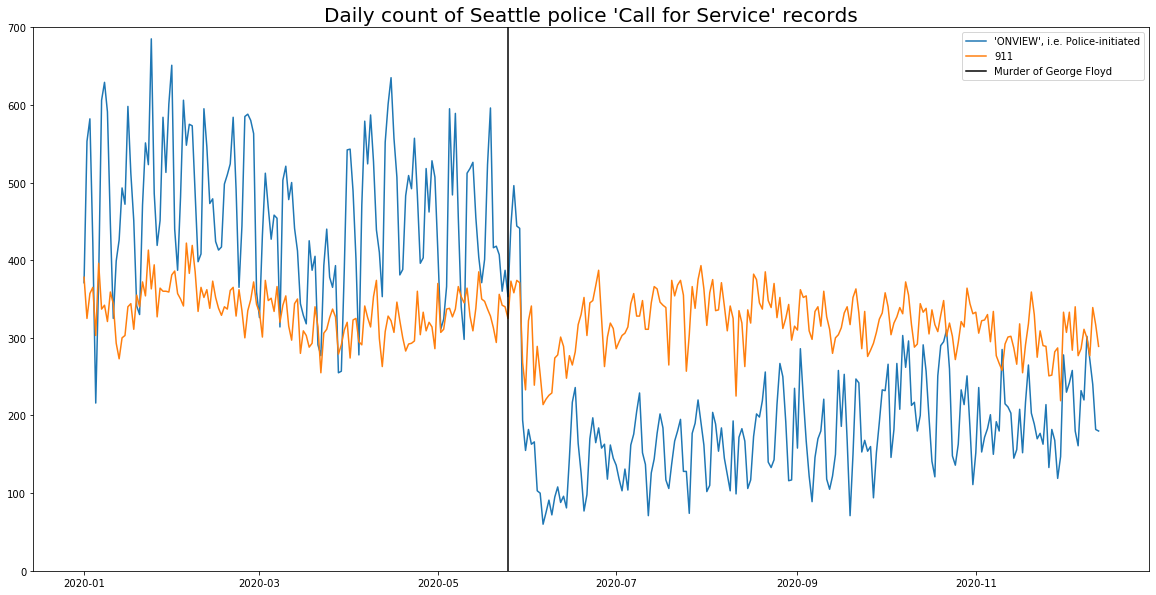

In [13]:
fig, ax = plt.subplots( figsize=(20,10) )
ax.plot( df[(df["Original Time Queued"]>"2020") & (df["Call Type"]=="ONVIEW")].groupby("date")["Call Type"].count(), label="'ONVIEW', i.e. Police-initiated" )
ax.plot( df[(df["Original Time Queued"]>"2020") & (df["Call Type"]=="911")].groupby("date")["Call Type"].count(), label="911" )
ax.set_ylim(0, 700)
ax.axvline(datetime(2020, 5, 25), color='k', linestyle='-', label="Murder of George Floyd")
ax.set_title("Daily count of Seattle police 'Call for Service' records", fontdict={'size':20})
ax.legend()

A drop within a week of this magnitude is unique in this dataset.

Text(0.5, 1.0, 'Daily count of officer-initiated ("ONVIEW") CfS events')

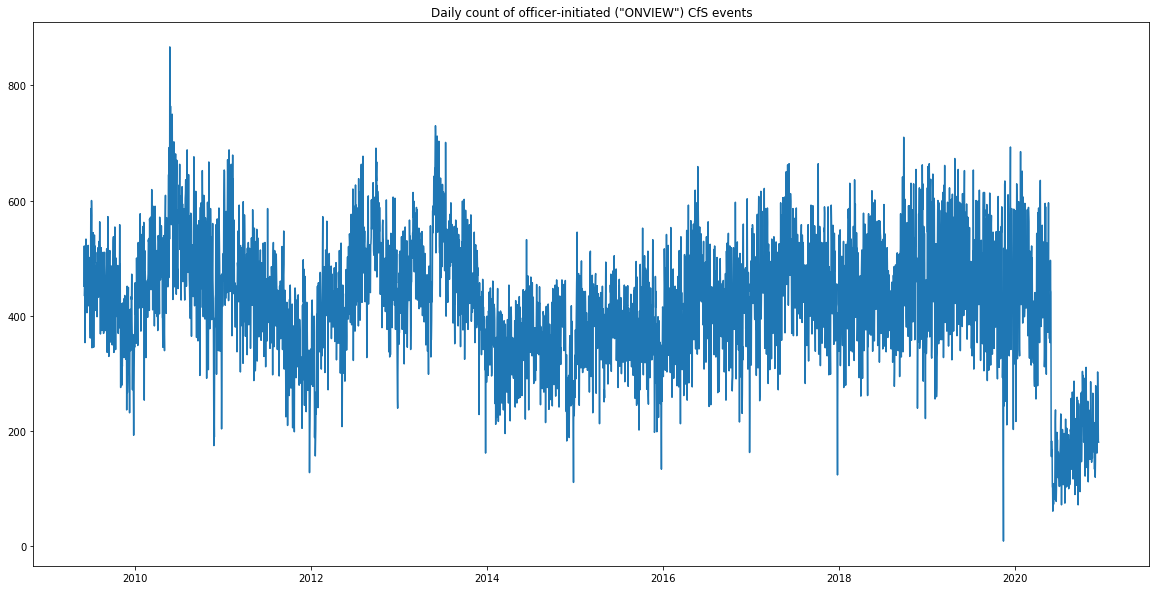

In [16]:
fig, ax = plt.subplots( figsize=(20,10) )
ax.plot( df[(df["Call Type"]=="ONVIEW")].groupby("date")["Call Type"].count() )
ax.set_title("Daily count of officer-initiated (\"ONVIEW\") CfS events")

Within ONVIEW calls, the time series of different call types varies significantly. The most common ONVIEW call, "directed patrol activity", rose rapidly after the pandemic peak and dropped at the George Floyd abdication. Before the abdication, this seems to be a data artifact of how "directed patrol activity" vs "traffic stop - officier initiated onview" calls were classified. After the abdication, they both fell off. Some call types seem totally unaffected by the adbication.

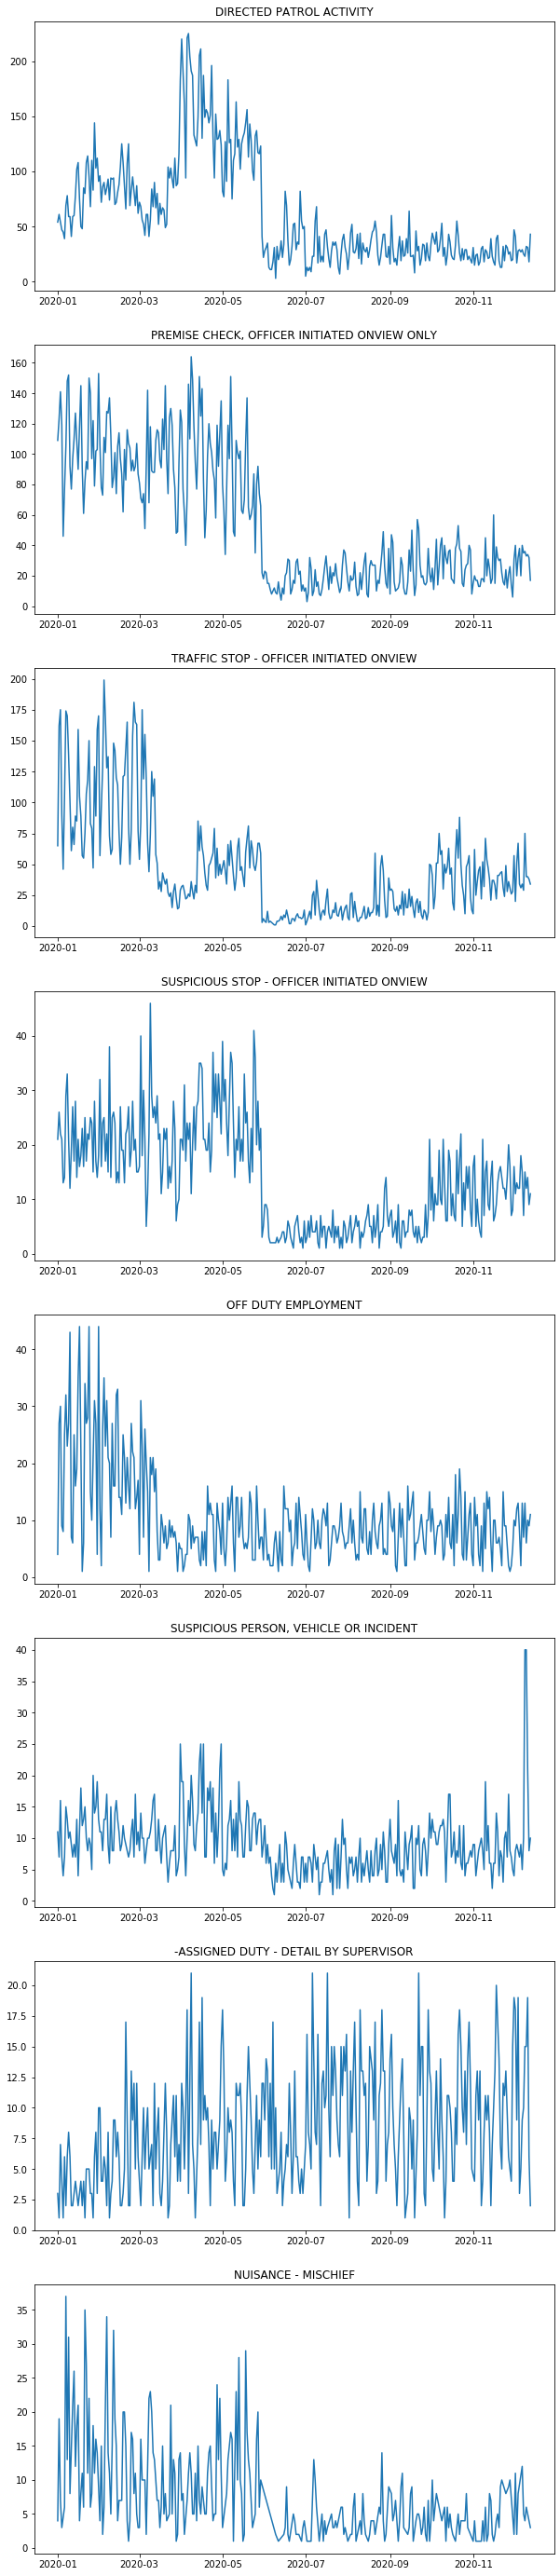

In [40]:
n=8
fig, axs = plt.subplots( n, 1, figsize=(10, 50) )


for ax, call_type in zip( axs, df_onview["Initial Call Type"].value_counts().head(n).index ):

    df_filter = df_onview[ df_onview["Initial Call Type"] == call_type ]
    ax.plot( df_filter.groupby("date")["Call Type"].count() )
    ax.set_title(call_type)

